# AI Assignment 1

In [31]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop,SGD,Adagrad,RMSprop,Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.models import load_model

from utils import plot_graph

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
batch_size = 32
num_classes = 10
epochs = 25

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [7]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Trial with one hidden layer

In [29]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=[x_test, y_test],
                    callbacks=[
                    ModelCheckpoint('model.h5', save_best_only=True)]
                    )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 5s - loss: 0.5923 - acc: 0.8596 - val_loss: 0.3339 - val_acc: 0.9102
Epoch 2/25
60000/60000 [==============================] - 5s - loss: 0.3150 - acc: 0.9127 - val_loss: 0.2708 - val_acc: 0.9231
Epoch 3/25
60000/60000 [==============================] - 5s - loss: 0.2672 - acc: 0.9258 - val_loss: 0.2421 - val_acc: 0.9333
Epoch 4/25
60000/60000 [==============================] - 5s - loss: 0.2368 - acc: 0.9346 - val_loss:

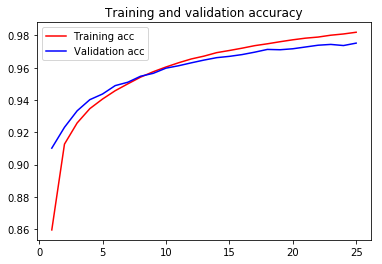

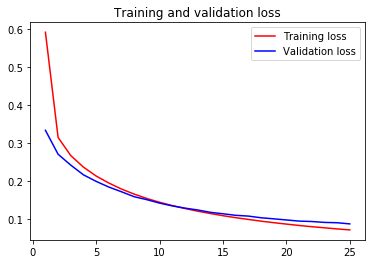

In [30]:
plot_graph(history)

In [31]:
model = load_model('model.h5')
acc = model.evaluate(x_test,y_test)
acc[1]*100

 9088/10000 [==========================>...] - ETA: 0s

97.519999999999996

#### One hidden layer with 1024 units gave test accuracy 97.519999999999996

In [32]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=[x_test, y_test],
                    callbacks=[
                    ModelCheckpoint('model.h5', save_best_only=True)]
                    )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 5s - loss: 0.6125 - acc: 0.8504 - val_loss: 0.3435 - val_acc: 0.9065
Epoch 2/25
60000/60000 [==============================] - 6s - loss: 0.3229 - acc: 0.9108 - val_loss: 0.2794 - val_acc: 0.9225
Epoch 3/25
60000/60000 [==============================] - 6s - loss: 0.2740 - acc: 0.9236 - val_loss: 0.2461 - val_acc: 0.9319
Epoch 4/25
60000/60000 [==============================] - 5s - loss: 0.2426 - acc: 0.9326 - val_loss:

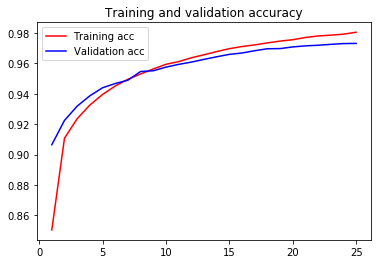

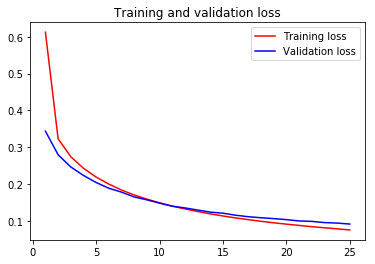

In [33]:
plot_graph(history)

In [34]:
model = load_model('model.h5')
acc = model.evaluate(x_test,y_test)
acc[1]*100

 8864/10000 [=========================>....] - ETA: 0s

97.319999999999993

#### One hidden layer with 512 units gave test accuracy 97.319999999999993

## Trial with 2 hidden layers

In [35]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=[x_test, y_test],
                    callbacks=[
                    ModelCheckpoint('model.h5', save_best_only=True)]
                    )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 9s - loss: 0.5462 - acc: 0.8636 - val_loss: 0.2856 - val_acc: 0.9205
Epoch 2/25
60000/60000 [==============================] - 8s - loss: 0.2675 - acc: 0.9241 - val_loss: 0.2316 - val_acc: 0.9361
Epoch 3/25
60000/60000 [==============================] - 8s - loss: 0.2154 - acc: 0.9392 - 

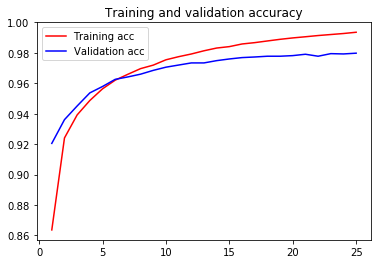

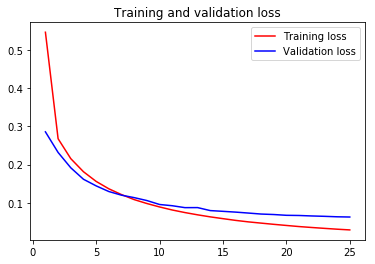

In [36]:
plot_graph(history)

In [37]:
model = load_model('model.h5')
acc = model.evaluate(x_test,y_test)
acc[1]*100

 9952/10000 [============================>.] - ETA: 0s

97.980000000000004

#### Two hidden layers with 1024 and 1024 units gave test accuracy 97.980000000000004

In [38]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=[x_test, y_test],
                    callbacks=[
                    ModelCheckpoint('model.h5', save_best_only=True)]
                    )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 7s - loss: 0.5361 - acc: 0.8674 - val_loss: 0.2809 - val_acc: 0.9214
Epoch 2/25
60000/60000 [==============================] - 7s - loss: 0.2608 - acc: 0.9259 - val_loss: 0.2222 - val_acc: 0.9381
Epoch 3/25
60000/60000 [==============================] - 8s - loss: 0.2109 - acc: 0.9401 - 

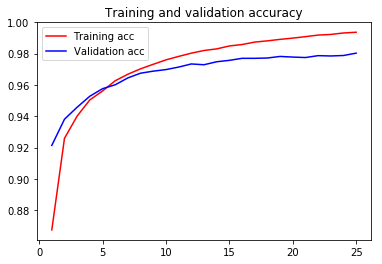

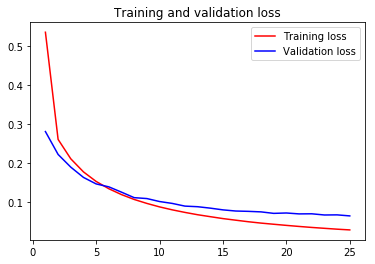

In [39]:
plot_graph(history)

In [40]:
model = load_model('model.h5')
acc = model.evaluate(x_test,y_test)
acc[1]*100

10000/10000 [==============================] - 0s     


98.030000000000001

#### Two hidden layers with 1024 and 512 units gave test accuracy 98.030000000000001

In [42]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=[x_test, y_test],
                    callbacks=[
                    ModelCheckpoint('model.h5', save_best_only=True)]
                    )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s - loss: 0.5698 - acc: 0.8572 - val_loss: 0.2929 - val_acc: 0.9185
Epoch 2/25
60000/60000 [==============================] - 6s - loss: 0.2753 - acc: 0.9210 - val_loss: 0.2323 - val_acc: 0.9337
Epoch 3/25
60000/60000 [==============================] - 6s - loss: 0.2243 - acc: 0.9356 - val_

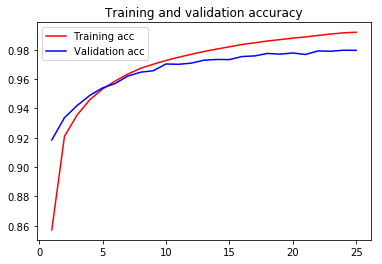

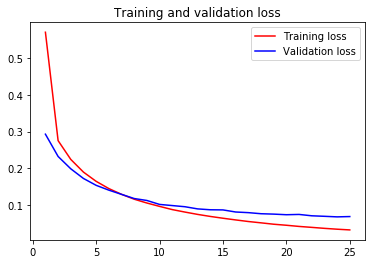

In [43]:
plot_graph(history)

In [44]:
model = load_model('model.h5')
acc = model.evaluate(x_test,y_test)
acc[1]*100

 9088/10000 [==========================>...] - ETA: 0s

97.969999999999999

#### Two hidden layers with 512 and 512 units gave test accuracy 97.969999999999999. Chose this model for further trials as this model was able to fit train data sufficiently with lesser overfit compared to model with 1024 and 512 units.

## Trial with sigmoid activation

In [45]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=[x_test, y_test],
                    callbacks=[
                    ModelCheckpoint('model.h5', save_best_only=True)]
                    )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_26 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s - loss: 2.1064 - acc: 0.3698 - val_loss: 1.7998 - val_acc: 0.4775
Epoch 2/25
60000/60000 [==============================] - 6s - loss: 1.3339 - acc: 0.7079 - val_loss: 0.9488 - val_acc: 0.7701
Epoch 3/25
60000/60000 [==============================] - 6s - loss: 0.7894 - acc: 0.8085 - val_

In [46]:
model = load_model('model.h5')
acc = model.evaluate(x_test,y_test)
acc[1]*100

 8448/10000 [========================>.....] - ETA: 0s

91.969999999999999

#### The model gave test accuracy 91.969999999999999 lower than the model with 'reLu' activation(97.969999999999999)


## Trial with tanh activation

In [47]:
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=[x_test, y_test],
                    callbacks=[
                    ModelCheckpoint('model.h5', save_best_only=True)]
                    )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_28 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_29 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 5s - loss: 0.4882 - acc: 0.8706 - val_loss: 0.3141 - val_acc: 0.9114
Epoch 2/25
60000/60000 [==============================] - 6s - loss: 0.3100 - acc: 0.9112 - val_loss: 0.2777 - val_acc: 0.9222
Epoch 3/25
60000/60000 [==============================] - 5s - loss: 0.2784 - acc: 0.9204 - val_

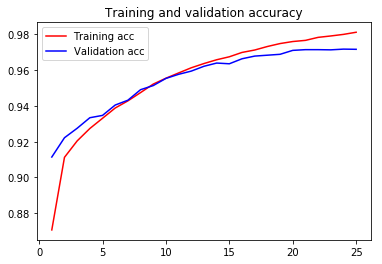

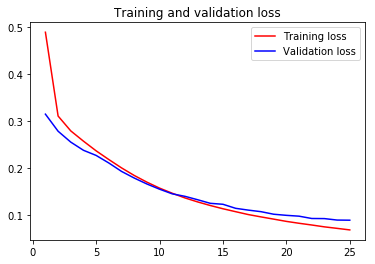

In [48]:
plot_graph(history)

In [49]:
model = load_model('model.h5')
acc = model.evaluate(x_test,y_test)
acc[1]*100

 8928/10000 [=========================>....] - ETA: 0s

97.170000000000002

#### The model gave test accuracy 97.170000000000002 lower than the model with 'reLu' activation(97.969999999999999)

## Trial with SGD(batch size = 1)

In [50]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=1,
                    epochs=15,
                    verbose=1,
                    validation_data=[x_test, y_test],
                    callbacks=[
                    ModelCheckpoint('model.h5', save_best_only=True)]
                    )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 168s - loss: 0.1964 - acc: 0.9399 - val_loss: 0.1046 - val_acc: 0.9670
Epoch 2/15
60000/60000 [==============================] - 168s - loss: 0.0840 - acc: 0.9731 - val_loss: 0.0764 - val_acc: 0.9766
Epoch 3/15
60000/60000 [==============================] - 167s - loss: 0.0536 - acc: 0.9831 

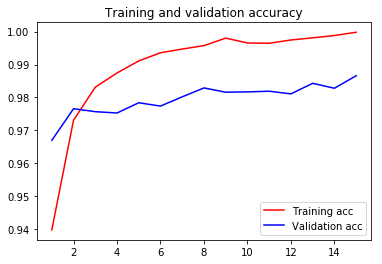

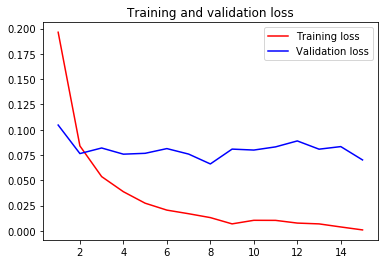

In [51]:
plot_graph(history)

In [52]:
model = load_model('model.h5')
acc = model.evaluate(x_test,y_test)
acc[1]*100

 9344/10000 [===========================>..] - ETA: 0s

98.290000000000006

#### The model gave test accuracy 98.290000000000006

## Trial with SGD(batch size = 32) with momentum = 0.9

In [54]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(momentum=0.9),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=[x_test, y_test],
                    callbacks=[
                    ModelCheckpoint('model.h5', save_best_only=True)]
                    )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_34 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_35 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s - loss: 0.2520 - acc: 0.9258 - val_loss: 0.1327 - val_acc: 0.9579
Epoch 2/25
60000/60000 [==============================] - 6s - loss: 0.1001 - acc: 0.9698 - val_loss: 0.0870 - val_acc: 0.9726
Epoch 3/25
60000/60000 [==============================] - 6s - loss: 0.0656 - acc: 0.9800 - val_

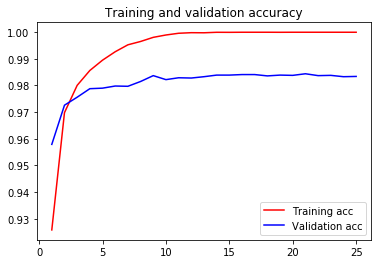

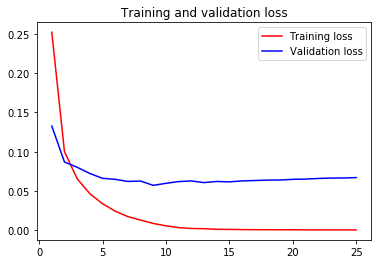

In [55]:
plot_graph(history)

In [56]:
model = load_model('model.h5')
acc = model.evaluate(x_test,y_test)
acc[1]*100

 8928/10000 [=========================>....] - ETA: 0s

98.370000000000005

#### The model gave test accuracy 98.370000000000005

## Trial with Adagrad

In [57]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='Adagrad',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=[x_test, y_test],
                    callbacks=[
                    ModelCheckpoint('model.h5', save_best_only=True)]
                    )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_37 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_38 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s - loss: 0.1646 - acc: 0.9499 - val_loss: 0.0878 - val_acc: 0.9730
Epoch 2/25
60000/60000 [==============================] - 6s - loss: 0.0623 - acc: 0.9812 - val_loss: 0.0681 - val_acc: 0.9779
Epoch 3/25
60000/60000 [==============================] - 6s - loss: 0.0387 - acc: 0.9890 - val_

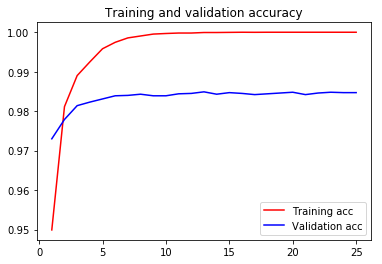

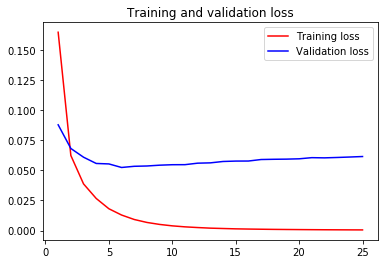

In [58]:
plot_graph(history)

In [59]:
model = load_model('model.h5')
acc = model.evaluate(x_test,y_test)
acc[1]*100

 9952/10000 [============================>.] - ETA: 0s

98.390000000000001

#### The model gave test accuracy 98.390000000000001

## Trial with Adam

In [74]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=[x_test, y_test],
                    callbacks=[
                    ModelCheckpoint('model.h5', save_best_only=True)]
                    )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_52 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_53 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 7s - loss: 0.1811 - acc: 0.9452 - val_loss: 0.1056 - val_acc: 0.9675
Epoch 2/25
60000/60000 [==============================] - 7s - loss: 0.0806 - acc: 0.9748 - val_loss: 0.0948 - val_acc: 0.9706
Epoch 3/25
60000/60000 [==============================] - 7s - loss: 0.0555 - acc: 0.9827 - val_

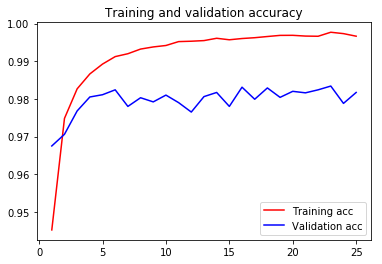

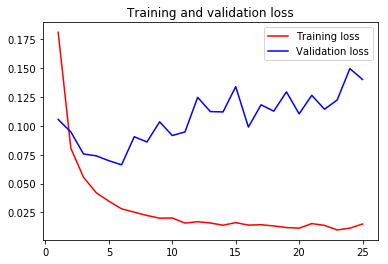

In [75]:
plot_graph(history)

In [76]:
model = load_model('model.h5')
acc = model.evaluate(x_test,y_test)
acc[1]*100

 9344/10000 [===========================>..] - ETA: 0s

98.240000000000009

#### The model gave test accuracy 98.240000000000009

## The Best Model 

#### Used Adam optimizer with default params and training by increasing batch size after fixed epochs and choosing the best model after each iteration

In [32]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=[x_test, y_test],
                    callbacks=[
                    ModelCheckpoint('model.h5', save_best_only=True)]
                    )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 8s - loss: 0.1847 - acc: 0.9445 - val_loss: 0.0913 - val_acc: 0.9715
Epoch 2/25
60000/60000 [==============================] - 6s - loss: 0.0785 - acc: 0.9753 - val_loss: 0.0795 - val_acc: 0.9754
Epoch 3/25
60000/60000 [==============================] - 6s - loss: 0.0565 - acc: 0.9820 - val_

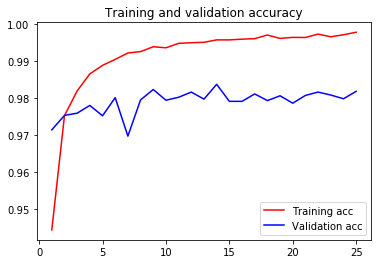

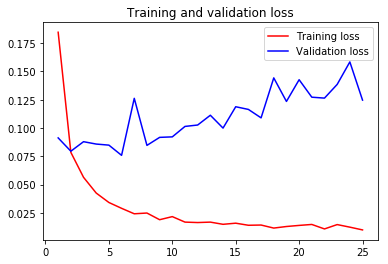

 9984/10000 [============================>.] - ETA: 0s

98.019999999999996

In [34]:
plot_graph(history)
model = load_model('model.h5')
acc = model.evaluate(x_test,y_test)
acc[1]*100

### Increasing batch size = 64

In [35]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=5,
                    verbose=1,
                    validation_data=[x_test, y_test],
                    callbacks=[
                    ModelCheckpoint('model.h5', save_best_only=True)]
                    )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s - loss: 0.0109 - acc: 0.9965 - val_loss: 0.0694 - val_acc: 0.9836
Epoch 2/5
60000/60000 [==============================] - 3s - loss: 0.0072 - acc: 0.9978 - val_loss: 0.0783 - val_acc: 0.9827
Epoch 3/5
60000/60000 [==============================] - 3s - loss: 0.0117 - acc: 0.9966 - val_loss: 0.0757 - val_acc: 0.9831
Epoch 4/5
60000/60000 [==============================] - 3s - loss: 0.0153 - acc: 0.9952 - val_loss: 0.0990 - val_acc: 0.9783
Epoch 5/5
60000/60000 [==============================] - 4s - loss: 0.0102 - acc: 0.9969 - val_loss: 0.0949 - val_acc: 0.9818


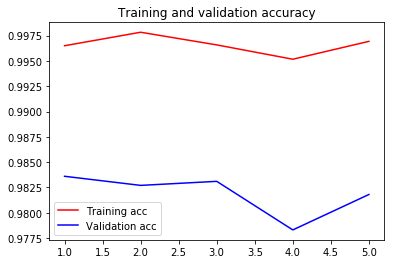

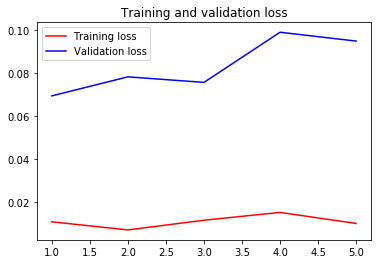

 9376/10000 [===========================>..] - ETA: 0s

98.269999999999996

In [38]:
plot_graph(history)
model = load_model('model.h5')
acc = model.evaluate(x_test,y_test)
acc[1]*100

### Increasing batch size = 128

In [39]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=5,
                    verbose=1,
                    validation_data=[x_test, y_test],
                    callbacks=[
                    ModelCheckpoint('model.h5', save_best_only=True)]
                    )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s - loss: 0.0029 - acc: 0.9991 - val_loss: 0.0700 - val_acc: 0.9851
Epoch 2/5
60000/60000 [==============================] - 2s - loss: 0.0011 - acc: 0.9998 - val_loss: 0.0679 - val_acc: 0.9866
Epoch 3/5
60000/60000 [==============================] - 2s - loss: 8.2210e-04 - acc: 0.9998 - val_loss: 0.0689 - val_acc: 0.9854
Epoch 4/5
60000/60000 [==============================] - 2s - loss: 8.7188e-04 - acc: 0.9999 - val_loss: 0.0746 - val_acc: 0.9862
Epoch 5/5
60000/60000 [==============================] - 2s - loss: 0.0106 - acc: 0.9973 - val_loss: 0.1116 - val_acc: 0.9786


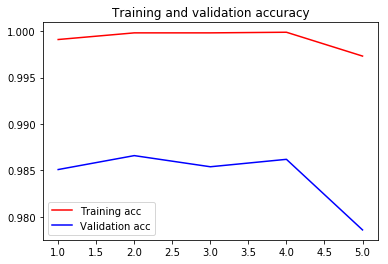

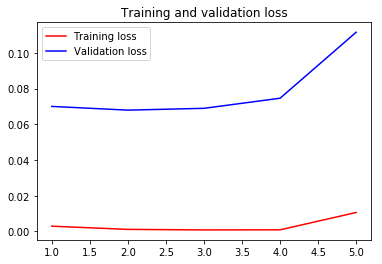

 9280/10000 [==========================>...] - ETA: 0s

98.659999999999997

In [40]:
plot_graph(history)
model = load_model('model.h5')
acc = model.evaluate(x_test,y_test)
acc[1]*100

### Increasing batch size = 256

In [41]:
history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=5,
                    verbose=1,
                    validation_data=[x_test, y_test],
                    callbacks=[
                    ModelCheckpoint('model.h5', save_best_only=True)]
                    )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s - loss: 5.6779e-04 - acc: 0.9999 - val_loss: 0.0680 - val_acc: 0.9866
Epoch 2/5
60000/60000 [==============================] - 1s - loss: 3.8589e-04 - acc: 1.0000 - val_loss: 0.0686 - val_acc: 0.9866
Epoch 3/5
60000/60000 [==============================] - 1s - loss: 3.5526e-04 - acc: 1.0000 - val_loss: 0.0694 - val_acc: 0.9865
Epoch 4/5
60000/60000 [==============================] - 1s - loss: 3.3881e-04 - acc: 1.0000 - val_loss: 0.0704 - val_acc: 0.9866
Epoch 5/5
60000/60000 [==============================] - 1s - loss: 3.2757e-04 - acc: 1.0000 - val_loss: 0.0711 - val_acc: 0.9863


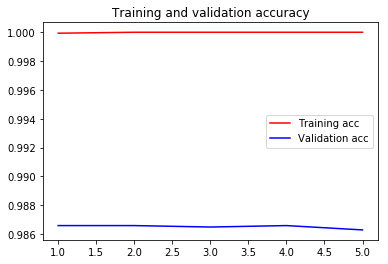

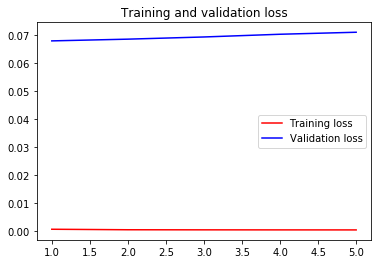

 8896/10000 [=========================>....] - ETA: 0s

98.659999999999997

In [42]:
plot_graph(history)
model = load_model('model.h5')
acc = model.evaluate(x_test,y_test)
acc[1]*100

#### The best model gave test accuracy 98.659999999999997